In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
# transform.Compose()主要是将若干个transform组装在一起
# transform.ToTensor() 可以将PIL Images或者UInt8的Numpy Array转换成范围在[0,1]的FloatTensor
# 其他情况会没有scaling地原样返回
# transforms.Normalize(mean, std) 会将Tensor normalize
# 具体的表达为 output[channel] = (input[channel] - mean[channel]) / std[channel]
# 原来Tensor的值域为[0, 1] --> (0-0.5)/0.5 = -1, (1-0.5)/0.5 = 1
# Tensor值域变为[-1, 1]
# 这里mean 和 std 的表达没有考虑到dataset中不同图像mean和std的分布，仅仅考虑了值域的范围
# 若果考虑到图像在不同channel上的分布, for best practice， 可以采用 ImageNet的分布
# mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# root 表示如果下载时的存放目录， train表示下载的是training set还是test set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


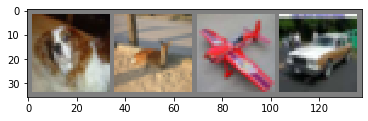

  dog  deer plane   car


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
#   将[-1, 1]的值域恢复到[0,1]
    img = img / 2 + 0.5
#   将Tensor转化为numpy array
    np_img = img.numpy()
#   Numpy array 同样也是（height, width, channel)
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

#     在PyTorch中支持两种dataset，一种是iterable-style的，一种是map-style的，后者支持__getitem__()(i.e. index)和__len__()
#     这是第一种iterator
dataiter = iter(train_loader)
images, labels = dataiter.next()

# make grid images
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [2]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
#       kernel_size = [2, 2] stride=2 maxpooling的kernel没有可训练参数，所以所有的pooling共用一个pooling layer即可
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
#       flatten
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()